In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

Text(0.5, 1.0, 'Number of trips per sample over time')

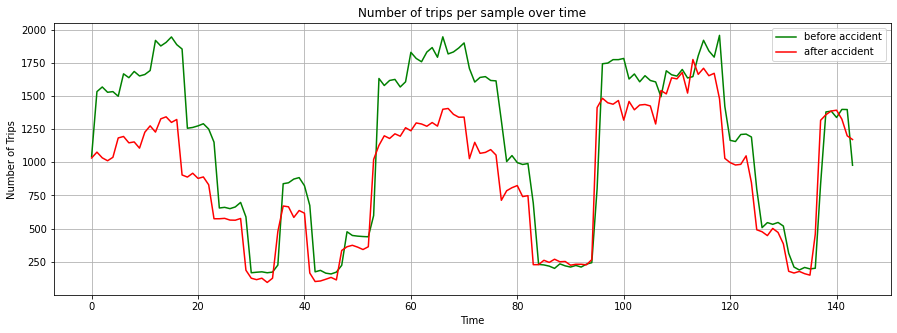

In [16]:
df1 = pd.read_csv('data.csv')
df1.head()

df11 = df1.iloc[:144, :].reset_index(drop=True)
df2 = df1.iloc[144:, :].reset_index(drop=True)
df2 =  df2.rename(columns={'avg': 'a', 'var': 'v', 'std': 's', 'median':'m', 'q1':'one', 'q3':'three', 'p90': 'nine'})
df1.head()


ax1 = df11.plot(y='numberOfTrips', c='g', figsize= (15,5), grid=True, label = 'before accident')
ax2 = df2.plot(y='numberOfTrips', c='r', figsize= (15,5), grid=True, ax=ax1, label='after accident')
ax2.set_ylabel("Number of Trips")
ax2.set_xlabel("Time")
ax2.set_title('Number of trips per sample over time')

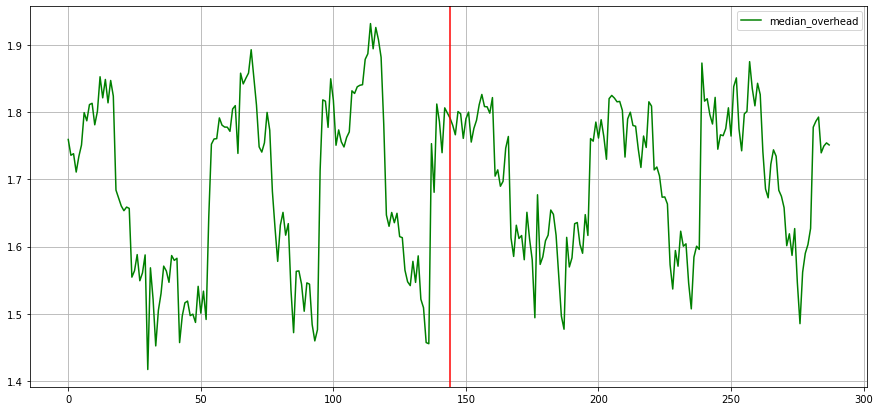

In [17]:
df = pd.read_csv('data.csv')
dd = df.plot(y='median_overhead', c='g', figsize= (15,7), grid=True)
dd = plt.axvline(x=144, color='r')

47


[0, 8656, 18602, 30044, 37522, 41455, 42458, 47456, 48458, 51108, 60524, 71275, 82498, 92081, 98007, 100633, 111077, 120701, 130533, 141549, 148539, 151688, 152877, 160968, 167038, 174015, 181843, 187001, 190344, 191021, 194732, 195397, 197549, 204516, 212128, 220227, 226691, 231312, 234123, 242613, 251039, 260482, 270493, 276439, 279306, 280269, 288229]


Text(0.5, 0, 'Time')

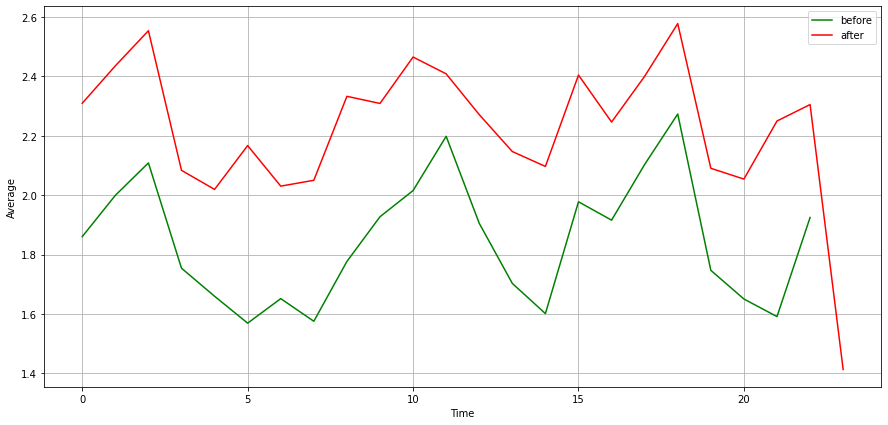

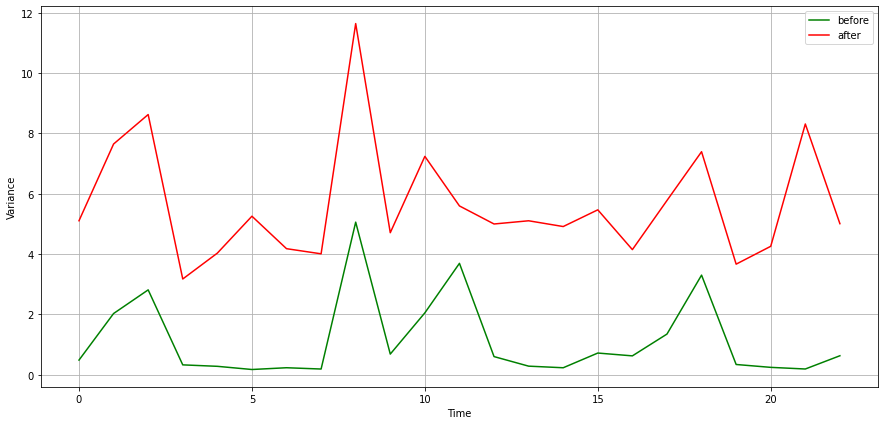

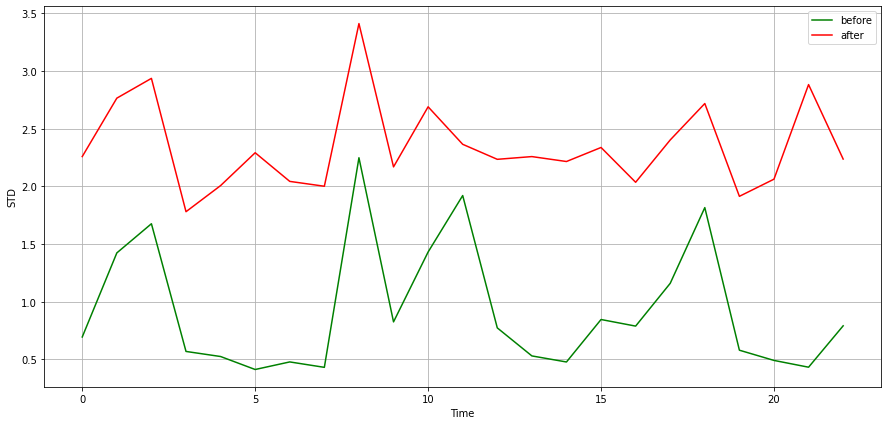

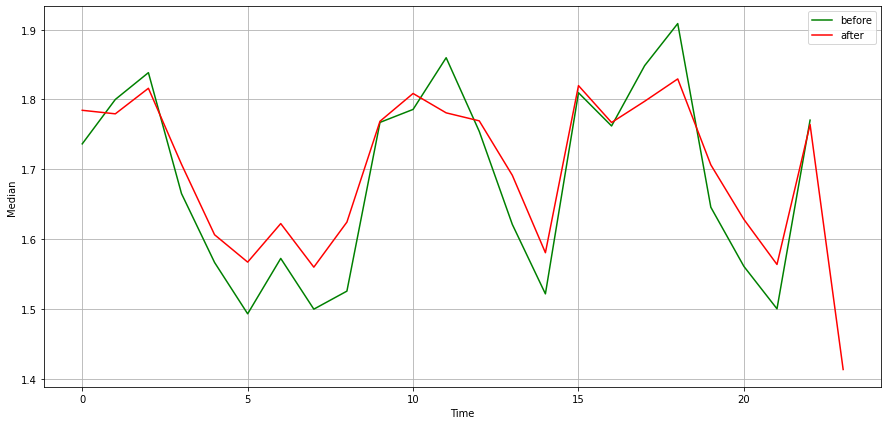

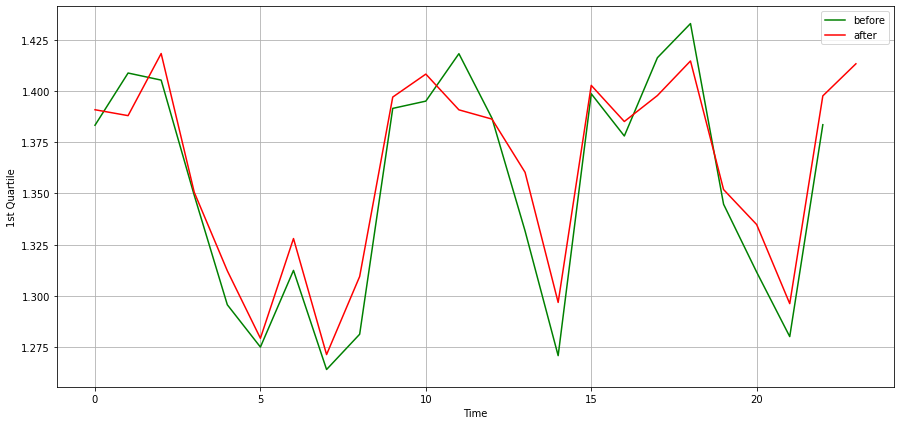

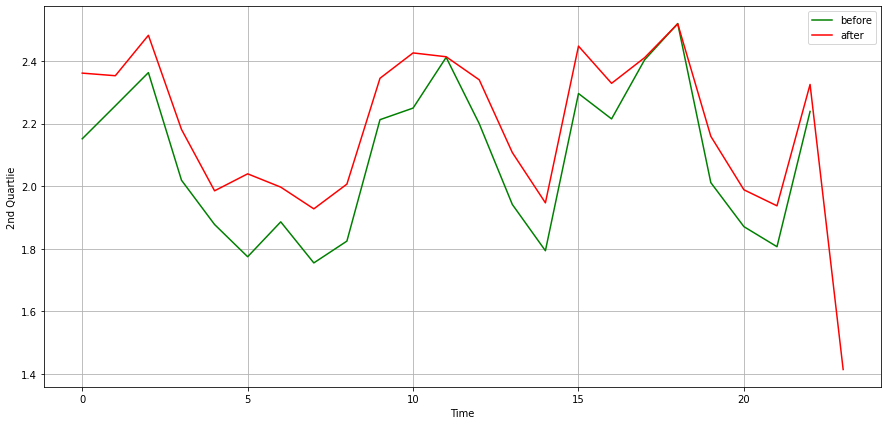

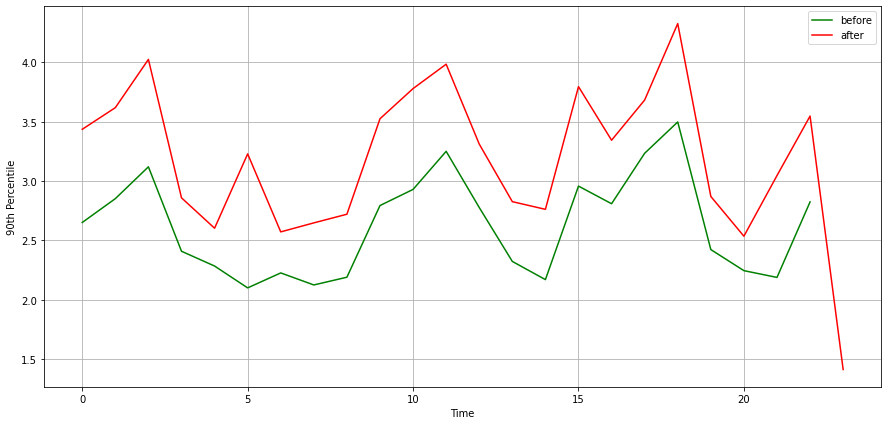

In [18]:
df =  pd.read_csv('raw_data.csv')
df.columns =["start", "total", 'overhead', 'duration']

df['c'] = df['total'].diff()
df_filtered = df[df['c'] != 0]

index_list = df_filtered.index.tolist() # list of the start poisitions of index for change of values 
print(len(index_list))
print('\n')
print(index_list)

l_mod = index_list + [max(index_list)+1] # creating a list of indexes to iterate over (must have 0 in it)
list_of_dfs = [df.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)] # creating a list of dfs for each index

len(list_of_dfs)

data = pd.DataFrame(columns=['avg', 'var', 'std', 'median', 'q1', 'q3', 'p90', 'cars'])
avg, var, std, median, q1, q3, p90, mode = [], [], [], [], [], [], [], []


for frame in list_of_dfs:
    median.append(frame['overhead'].median())
    avg.append(frame['overhead'].mean())
    q1.append(frame['overhead'].quantile(q =.25))
    q3.append(frame['overhead'].quantile(q =.75))
    p90.append(frame['overhead'].quantile(q =.9))
    mode.append(frame['total'].mode()[0]) # mode returns a series so we need to specify which value to return
    var.append(frame['overhead'].var())
    std.append(frame['overhead'].std())

    
    
data['median'] = median
data['q1'] = q1
data['q3'] = q3
data['p90']= p90
data['cars'] = mode
data['avg'] = avg
data['var'] = var
data['std'] = std
data.head()

df1 = data.iloc[:23, :].reset_index(drop=True)
df2 = data.iloc[23:, :].reset_index(drop=True)
df2 =  df2.rename(columns={'avg': 'a', 'var': 'v', 'std': 's', 'median':'m', 'q1':'one', 'q3':'three', 'p90': 'nine'})
df1.head()

ax1 = df1.plot(y='avg', c='g', figsize= (15,7), grid=True, label = 'before')
ax2 = df2.plot(y='a', c='r', figsize= (15,7), grid=True, ax=ax1, label='after')
ax2.set_ylabel("Average")
ax2.set_xlabel("Time")

ax3 = df1.plot(y='var', c='g', figsize= (15,7), grid=True, label = 'before')
ax4 = df2.plot(y='v', c='r', figsize= (15,7), grid=True, ax=ax3, label='after')
ax4.set_ylabel("Variance")
ax4.set_xlabel("Time")

ax5 = df1.plot(y='std', c='g', figsize= (15,7), grid=True, label = 'before')
ax6 = df2.plot(y='s', c='r', figsize= (15,7), grid=True, ax=ax5, label='after')
ax6.set_ylabel("STD")
ax6.set_xlabel("Time")

ax7 = df1.plot(y='median', c='g', figsize= (15,7), grid=True, label = 'before')
ax8 = df2.plot(y='m', c='r', figsize= (15,7), grid=True, ax=ax7, label='after')
ax8.set_ylabel("Median")
ax8.set_xlabel("Time")

ax9 = df1.plot(y='q1', c='g', figsize= (15,7), grid=True, label = 'before')
ax10 = df2.plot(y='one', c='r', figsize= (15,7), grid=True, ax=ax9, label='after')
ax10.set_ylabel("1st Quartile")
ax10.set_xlabel("Time")

ax11 = df1.plot(y='q3', c='g', figsize= (15,7), grid=True, label = 'before')
ax12 = df2.plot(y='three', c='r', figsize= (15,7), grid=True, ax=ax11, label='after')
ax12.set_ylabel("2nd Quartlie")
ax12.set_xlabel("Time")

ax13 = df1.plot(y='p90', c='g', figsize= (15,7), grid=True, label = 'before')
ax14 = df2.plot(y='nine', c='r', figsize= (15,7), grid=True, ax=ax13, label='after')
ax14.set_ylabel("90th Percentile")
ax14.set_xlabel("Time")

Text(0.5, 1.0, 'Case 1')

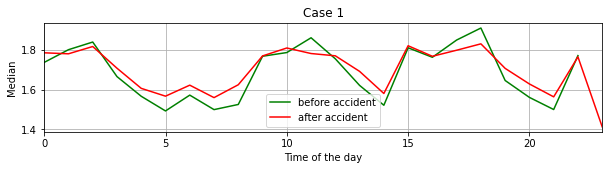

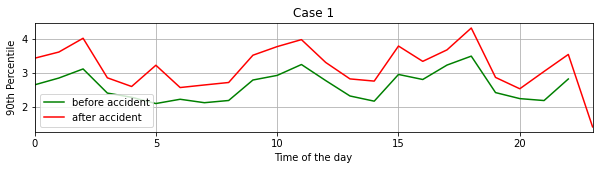

In [19]:
ax7 = df1.plot(y='median', c='g', figsize= (10,2), grid=True, label = 'before accident')
ax8 = df2.plot(y='m', c='r', figsize= (10,2), grid=True, ax=ax7, label='after accident')
ax8.set_ylabel("Median")
ax8.set_xlim(0, 23)
ax8.set_xlabel("Time of the day")
ax8.set_title("Case 1")

ax13 = df1.plot(y='p90', c='g', figsize= (10,2), grid=True, label = 'before accident')
ax14 = df2.plot(y='nine', c='r', figsize= (10,2), grid=True, ax=ax13, label='after accident')
ax14.set_ylabel("90th Percentile")
ax14.set_xlabel("Time of the day")
ax14.set_xlim(0, 23)
ax14.set_title("Case 1")